<a href="https://colab.research.google.com/github/m-garciar/machine-learning/blob/main/Notebook_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Enunciado 
SaludAlpes es una entidad de salud colombiana que se especializa en atender pacientes diagnosticados con diabetes.

Entre las actividades principales de SaludAlpes se destaca el análisis de resultados de laboratorio para la detección de diabetes.

Este servicio de diagnóstico implica el análisis manual por parte de médicos especialistas, a partir de los resultados de exámenes de laboratorio, lo cual ha generado en los últimos años, una serie de problemas asociados con los tiempos de atención a estos pacientes, causada por demoras en la confirmación del diagnóstico.

SaludAlpes los ha contratado para agilizar y mejorar el proceso de análisis de resultados clínicos de tal manera que se reduzcan los tiempos de confirmación de diagnóstico y se agilice el inicio del tratamiento a paciente con diabetes confirmada.

# 0. Impotar librerías y cargar datos

In [ ]:
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
# Librerías para manejo de datos
import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar
import numpy as np
np.random.seed(3301)
# Para preparar los datos
from sklearn.preprocessing import LabelEncoder
# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 
# Para usar KNN como clasificador
from sklearn.neighbors import KNeighborsClassifier
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 
# Librerías para la visualización
import matplotlib as mplt
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns 
from sklearn import tree
#Analisis profundo de datos
# from pandas_profiling import ProfileReport
#Librería para realizar SMOTE
import imblearn
## Regresión Logistica
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
data_raw=pd.read_csv('Datos_Clasificacion_2022.csv', sep=';', encoding = 'utf-8',index_col=None)

# 1. Entendimiento y limpieza de datos

Para empezar, se dará una vista general a los datos


In [ ]:
# Revisamos cuántos registros tenemos
data_raw.shape

(100000, 27)

In [ ]:
# Luego vemos a grandes rasgos cada columna, para ver el tipo de dato que tiene
data_raw.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,0,1,1,1,40,1,0,0,0,0,1,0,...,18,15,1,0,9,4,3,NaN,NaN,NaN,NaN,NaN
1,0,0,0,0,25,1,0,0,1,0,0,0,...,0,0,0,0,7,6,1,NaN,NaN,NaN,NaN,NaN
2,0,1,1,1,28,0,0,0,0,1,0,0,...,30,30,1,0,9,4,8,NaN,NaN,NaN,NaN,NaN
3,0,1,0,1,27,0,0,0,1,1,1,0,...,0,0,0,0,11,3,6,NaN,NaN,NaN,NaN,NaN
4,0,1,1,1,24,0,0,0,1,1,1,0,...,3,0,0,0,11,5,4,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Miramos también el tipo de dato de cada columna
data_raw.dtypes

Diabetes_012             object
HighBP                   object
HighChol                 object
CholCheck                object
BMI                      object
Smoker                   object
Stroke                   object
HeartDiseaseorAttack     object
PhysActivity             object
Fruits                   object
Veggies                  object
HvyAlcoholConsump        object
AnyHealthcare            object
NoDocbcCost              object
GenHlth                  object
MentHlth                 object
PhysHlth                 object
DiffWalk                 object
Sex                      object
Age                      object
Education                object
Income                   object
Unnamed: 22             float64
Unnamed: 23             float64
Unnamed: 24             float64
Unnamed: 25             float64
Unnamed: 26             float64
dtype: object

Nótese que el tipo de dato de las columnas no coincide con los detalles que se daban en el diccionario de los datos. 

Por ejemplo, la columna edad debería tener valores entre 1 y 13, por lo que el tipo de dato debería ser int o float.

Para ver esto con más cuidado, veamos los valores únicos de cada columna

In [ ]:
#Creamos un arreglo con los nombres de las columnas
col_names = list(data_raw)
#Revisamos los valores que tiene cada columna
for name in col_names:
  print(name)
  print(data_raw[name].unique())

Diabetes_012
['0' '2' '1' '-' nan '?' 'Xx' 0 2 1]
HighBP
['1' '0' nan '-' 'Xx' '?' 0 1]
HighChol
['1' '0' 'Xx' '-' nan '?' 1 0]
CholCheck
['1' '0' '-' nan '?' 'Xx' 1 0]
BMI
['40' '25' '28' '27' '24' '30' '34' '26' '33' '21' '23' '22' '38' '32'
 '37' '31' '29' '20' '35' '45' '39' '19' '47' '18' '36' '43' '55' '49'
 '42' '17' '-15' '16' '41' '44' '-35' '-25' '50' '59' '-21' '48' '52' '46'
 '-33' 'Xx' '54' '-31' '57' nan '53' '14' '15' '51' '-23' '-' '58' '63'
 '-17' '61' '-29' '?' '56' '-27' '74' '62' '64' '-19' '66' '73' '85' '60'
 '67' '65' '70' '82' '79' '92' '68' '72' '88' '96' '13' '81' '71' '75'
 '12' '77' '69' '76' '87' '89' '84' '95' '98' '91' '86' '83' 35 39 30 21
 27 28 24 22 33 26 38 34 29 31 50 25 43 32 18 46 20 36 45 37 40 23 -15 41
 15 68 19 17 48 44 -23 42 -27 47 52 51 60 -17 16 65 49 64 59 -31]
Smoker
['1' '0' 'Xx' '-' nan '?' 0 1]
Stroke
['0' '1' '-' nan 'Xx' '?' 0 1]
HeartDiseaseorAttack
['0' '1' nan 'Xx' '-' '?' 0 1]
PhysActivity
['0' '1' 'Xx' '-' nan '?' 1 0]
Fruits
[

Con esto en mente se tomaron las siguientes decisiones de limpieza:

- Se convirtieron los valores 'Xx', '-', '?' a NaN, pues se consideran datos perdidos
- Todos los números que se encuentran como string se pasaron a entero
- La columnas Unnamed 22-26 no tienen ningún dato, por lo que se retirarán
- Los valores negativos de la variables BMI, MentHlth y PhysHlth se acercan al valor mas cercano en la escala, en este caso 0.
- Los valores de MentHlth y PhysHlth por encima de 30 se consideran valores nulos, de acuerdo con la codificación de los datos
- Dado que el objetivo del clasificador es agilizar el tratamiento de aquellos pacientes que lo necesiten, se unirá a los pacientes que tengan prediabetes y diabetes en una misma categoría

In [ ]:
data=data_raw.replace({'-':np.nan,'?':np.nan,'Xx':np.nan})
data=data.drop(columns=['Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25','Unnamed: 26'])
col_names = list(data)
for name in col_names:
  data[name] = pd.to_numeric(data[name])
data = abs(data)
data['Diabetes_012']=data['Diabetes_012'].replace({2:1})
data[data['MentHlth']>30]=np.nan
data[data['PhysHlth']>30]=np.nan

#Las filas que tiene datos NaN se retiran del dataframe y se revisa cuantas filas quedan
data.dropna(inplace=True)
data.shape

(98541, 22)

In [ ]:
#Creamos un arreglo con los nombres de las columnas
col_names = list(data)
#Revisamos los valores que tiene cada columna
for name in col_names:
  print(name)
  print(data[name].unique())

Diabetes_012
[0. 1.]
HighBP
[1. 0.]
HighChol
[1. 0.]
CholCheck
[1. 0.]
BMI
[40. 25. 28. 27. 24. 30. 34. 26. 33. 21. 23. 22. 38. 37. 31. 29. 20. 32.
 35. 45. 39. 19. 47. 18. 36. 43. 55. 49. 42. 17. 15. 41. 16. 44. 50. 59.
 48. 52. 46. 54. 57. 53. 14. 51. 58. 63. 61. 56. 74. 62. 64. 66. 73. 85.
 60. 67. 65. 70. 82. 79. 92. 68. 72. 88. 96. 13. 81. 71. 75. 12. 77. 69.
 76. 87. 89. 84. 95. 98. 91. 86. 83.]
Smoker
[1. 0.]
Stroke
[0. 1.]
HeartDiseaseorAttack
[0. 1.]
PhysActivity
[0. 1.]
Fruits
[0. 1.]
Veggies
[1. 0.]
HvyAlcoholConsump
[0. 1.]
AnyHealthcare
[1. 0.]
NoDocbcCost
[0. 1.]
GenHlth
[5. 3. 2. 4. 1.]
MentHlth
[18.  0. 30.  3.  5. 15. 10.  6. 20.  2. 25.  1.  4.  7. 21. 14. 26. 29.
 16. 11. 28. 12.  8. 24. 17. 13. 27. 22. 19.  9. 23.]
PhysHlth
[15.  0. 30.  2. 24. 28.  7. 20.  3. 10.  1.  5. 17.  4. 19.  6. 14. 12.
 25. 27. 21. 22.  8. 29.  9. 16. 18. 23. 13. 26. 11.]
DiffWalk
[1. 0.]
Sex
[0. 1.]
Age
[ 9.  7. 11. 10.  8. 13.  4.  6.  2. 12.  5.  1.  3.]
Education
[4. 6. 3. 5. 2. 1.]
In

In [ ]:
#ProfileReport(data)

# 2. Preparación de los datos

Dividiremos los datos en 2 grupos. 80% se dejarán para entrenamiento y 20% se dejarán para evaluar su rendimiento

In [ ]:
# Se selecciona la variable objetivo, en este caso "Diabetes_012".
Y = data['Diabetes_012']
# Del conjunto de datos se elimina la variable "Diabetes_012"
X = data.drop(['Diabetes_012'], axis=1)

In [ ]:
# Dividir los datos en entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape

(78832, 21)

In [ ]:
X_test.shape

(19709, 21)

In [ ]:
Y_train.value_counts()

0.0    66305
1.0    12527
Name: Diabetes_012, dtype: int64

Como se puede ver, hay un mayor número de datos de personas sin diabetes que de personas con prediabetes y diabetes. Para evitar que esto sesge los resultados del modelo, se realiza una técnica de oversampling.

Al usar SMOTE, se generan nuevas observaciones del 

In [ ]:
oversample = imblearn.over_sampling.SMOTENC(random_state=0, categorical_features=[0,1,2,4,5,6,7,8,9,10,11,12,16,17])
#X_resampled, Y_resampled = oversample.fit_resample(X_train,Y_train)
X_resampled, Y_resampled = oversample.fit_resample(X_train,Y_train)

In [ ]:
Y_resampled.value_counts()

0.0    66305
1.0    66305
Name: Diabetes_012, dtype: int64

# 3. Construcción de modelos
Luego de limpiar y ajustar los datos, se construirán y entrenarán 3 modelos diferentes, con lo que se pretende evaluar el que tenga mejor capacidad de identificar pacientes que necesiten tratamiento

## Árbol de decisión
Elaborado por: Juan Manuel Rivera

Se evaluarán diferentes valores para los siguientes hiperparámetros:
- **Criterio:** Se evaluarán los modelos en función de su entropía y del ídnice de Gini
- **Máxima profundidad:** se evaluarán diferentes profundidades para los árboles.
- **Mínimo número de hojas**: Se probará con diferentes números mínimos de división en cada nodo

In [ ]:
# Establecemos el espacio de búsqueda para los hiperparámetros que deseamos ajustar. 
param_grid = {'criterion':['gini', 'entropy'],'max_depth':[2,3,4,5,6,8,10,12,14,16,18,20,22],'min_samples_split':[2, 3, 4]}

Además, para que el modelo obtenido tenga un valor de error promedio se realizará una validación cruzada con 10 particiones

In [ ]:
# Fijemos el número de particiones. Utilizaremos K = 10.
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)
# Definimos el modelo sin ningún valor de estos hiperparámetros
arbol = DecisionTreeClassifier(random_state=0)

### Modelo entrado sin SMOTE
Este modelo se entrenó con:
-  66305 pacientes que no requieren tratamiento
- 12527 que sí lo requieren

In [ ]:
# Se usará el método GridSearch para evaluar los diferentes hiperparámetros con la partición cruzada con K=10
mejor_modelo = GridSearchCV(arbol, param_grid, cv=particiones)
# Ajuste del modelo
mejor_modelo.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 18, 20,
                                       22],
                         'min_samples_split': [2, 3, 4]})

In [ ]:
#Parámetros del mejor modelo
mejor_modelo.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}

In [ ]:
# Obtener el mejor modelo.
arbol_sin_SMOTE = mejor_modelo.best_estimator_
# Probemos ahora este modelo sobre test.
y_pred_train = arbol_sin_SMOTE.predict(X_train)
y_pred_test = arbol_sin_SMOTE.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.85
Exactitud sobre test: 0.85


In [ ]:
# Veamos las métricas del modelo con los datos de entrenamento sin SMOTE
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92     16598
         1.0       0.65      0.13      0.22      3111

    accuracy                           0.85     19709
   macro avg       0.75      0.56      0.57     19709
weighted avg       0.83      0.85      0.81     19709



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


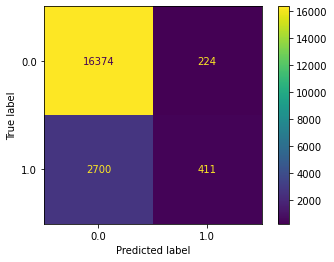

In [ ]:
plot_confusion_matrix(arbol_sin_SMOTE, X_test, Y_test)  
 

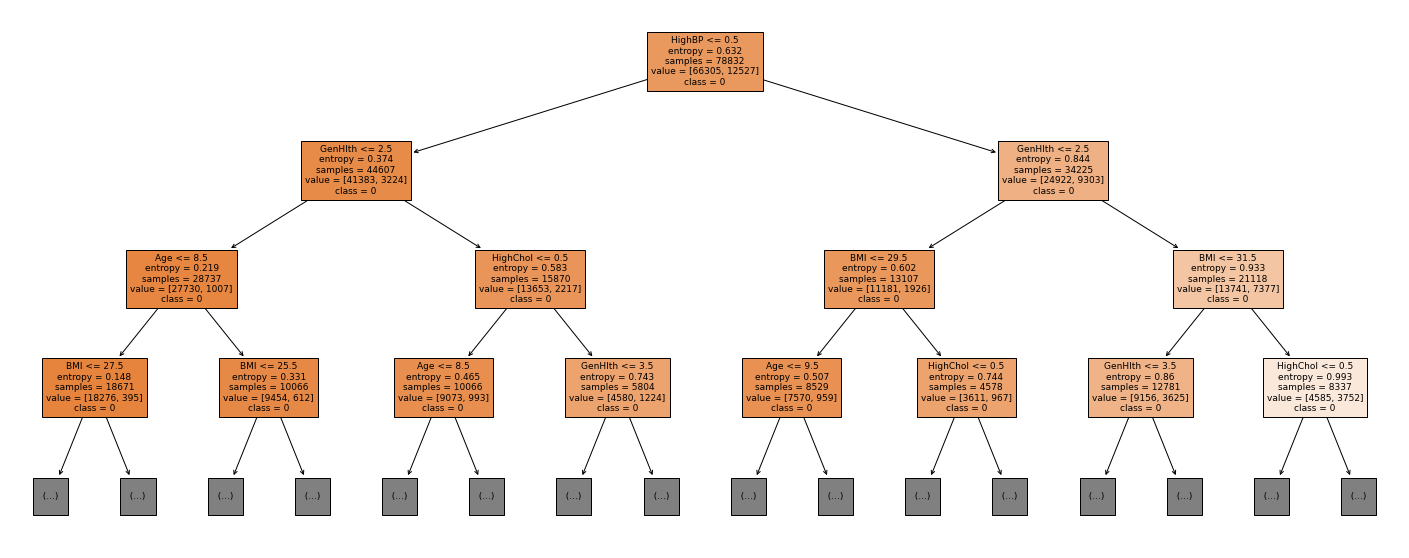

In [ ]:
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(arbol_sin_SMOTE, max_depth=3, feature_names=X.columns, class_names=["0", "1"], filled=True, fontsize=9)

### Modelo entrenado con SMOTE
Este modelo se entrenó con:
- 66368 pacientes que no requieren tratamiento
- 66368 que sí lo requieren.

In [ ]:
# Ahora utilizamos GridSearch sobre el grid definido y con 10 particiones en la validación cruzada.
mejor_modelo_2 = GridSearchCV(arbol, param_grid, cv=particiones)
# Ajuste del modelo
mejor_modelo_2.fit(X_resampled, Y_resampled)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 8, 10, 12, 14, 16, 18, 20,
                                       22],
                         'min_samples_split': [2, 3, 4]})

In [ ]:
mejor_modelo_2.best_params_

{'criterion': 'entropy', 'max_depth': 22, 'min_samples_split': 4}

In [ ]:
# Obtener el mejor modelo.
arbol_con_SMOTE = mejor_modelo_2.best_estimator_
# Probemos ahora este modelo sobre test.
y_pred_train = arbol_con_SMOTE.predict(X_train)
y_pred_test = arbol_con_SMOTE.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.92
Exactitud sobre test: 0.78


In [ ]:
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87     16598
         1.0       0.34      0.38      0.36      3111

    accuracy                           0.78     19709
   macro avg       0.61      0.62      0.61     19709
weighted avg       0.80      0.78      0.79     19709



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


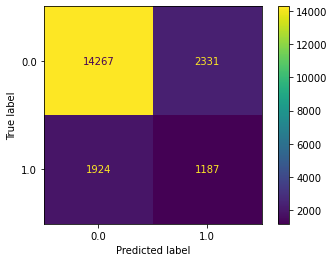

In [ ]:
plot_confusion_matrix(arbol_con_SMOTE, X_test, Y_test) 

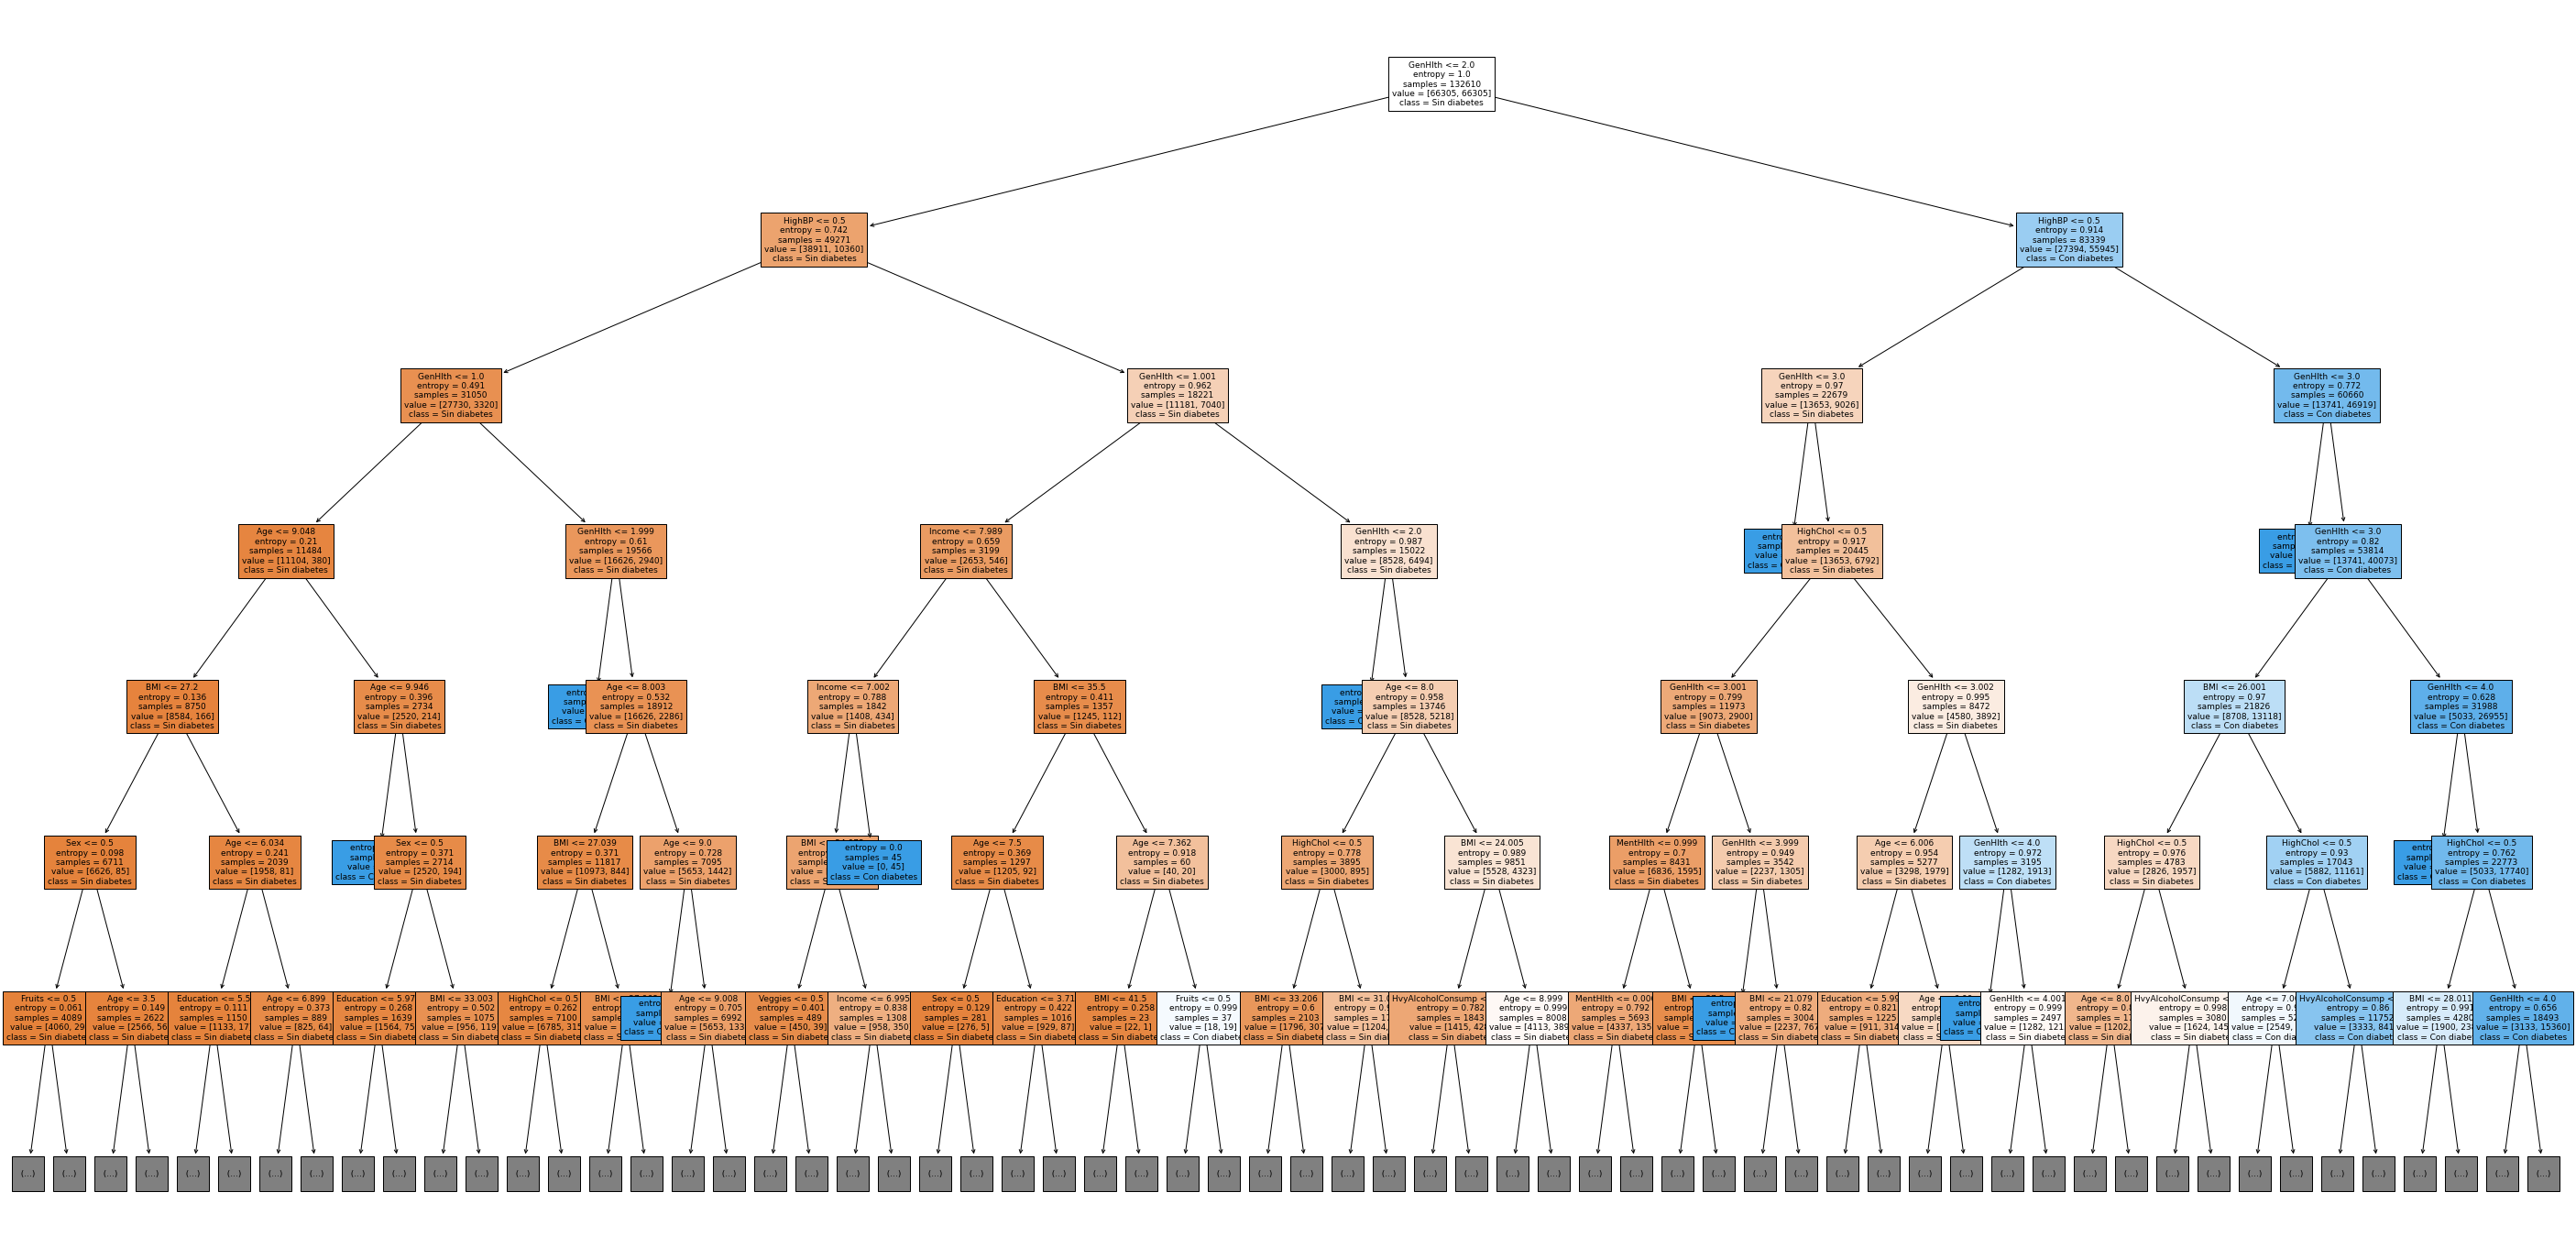

In [ ]:
fig = plt.figure(figsize=(50,25))
_ = tree.plot_tree(arbol_con_SMOTE, max_depth=6, feature_names=X.columns, class_names=["Sin diabetes", "Con diabetes"], filled=True, fontsize=9)

## K-Nearest Neighbors (KNN)
Elaborado por: Juan David Villamil

Para KNN se probara con diferentes valores para el numero K de vecinos cercanos asi como la funcion de distancia que se usara.
Sin embargo debido a que KNN funciona mediante el calculo de las distancias entre elementos el cual tienen en cuenta todos los valores de los elementos y dado que a pesa de que la mayoria de variables son binarias existen algunas que poseen un dominio mas amplio, por ello se creara un set de datos en donde estas variables se encuentren normalizadas

In [ ]:
#Normalizar los datos
data_cop = data.copy()
data_cop
normalized_df=(data_cop-data_cop.min())/(data_cop.max()-data_cop.min())
normalized_df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,0.325581,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.00,0.6,0.500000,1.0,0.0,0.666667,0.6,0.285714
1,0.0,0.0,0.0,0.0,0.151163,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.50,0.0,0.000000,0.0,0.0,0.500000,1.0,0.000000
2,0.0,1.0,1.0,1.0,0.186047,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.00,1.0,1.000000,1.0,0.0,0.666667,0.6,1.000000
3,0.0,1.0,0.0,1.0,0.174419,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.25,0.0,0.000000,0.0,0.0,0.833333,0.4,0.714286
4,0.0,1.0,1.0,1.0,0.139535,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.25,0.1,0.000000,0.0,0.0,0.833333,0.8,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,1.0,1.0,1.0,0.081395,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.50,0.0,0.133333,0.0,0.0,0.833333,0.8,0.571429
99996,0.0,1.0,1.0,1.0,0.151163,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.25,0.0,0.333333,1.0,0.0,1.000000,0.6,0.571429
99997,0.0,0.0,1.0,1.0,0.197674,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.25,0.0,0.000000,0.0,0.0,0.583333,0.6,1.000000
99998,0.0,1.0,1.0,1.0,0.139535,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.916667,0.4,0.285714


In [ ]:
# Se selecciona la variable objetivo, en este caso "Diabetes_012".
Y_n = normalized_df['Diabetes_012']
# Del conjunto de datos se elimina la variable "Diabetes_012"
X_n = normalized_df.drop(['Diabetes_012'], axis=1)

X_train_n, X_test_n, Y_train_n, Y_test_n = train_test_split(X_n, Y_n, test_size=0.2, random_state=0)

Adicionalmente se crea un set de datos al cual se le aplica oversample

In [ ]:
#oversample = imblearn.over_sampling.SMOTE()
#X_resampled_n, Y_resampled_n = oversample.fit_resample(X_train_n,Y_train_n)

oversample_n = imblearn.over_sampling.SMOTENC(random_state=0, categorical_features=[0,1,2,4,5,6,7,8,9,10,11,12,16,17])
X_resampled_n, Y_resampled_n = oversample.fit_resample(X_train_n,Y_train_n)

Ahora se entrena un modelo de KNN para cada una de los modelos de los que se dispone para compararlos.

### KNN con datos normalizados, sin oversampling

In [ ]:
#Normalizado
neigh = KNeighborsClassifier(n_neighbors=8) # arbol = DecisionTreeClassifier(criterion='entropy', random_state=0)
neigh = neigh.fit(X_train_n, Y_train_n) # arbol = arbol.fit(X_train,Y_train)
y_pred = neigh.predict(X_test_n) # y_pred = arbol.predict(X_test)
print('Exactitud: %.2f' % accuracy_score(Y_test_n, y_pred))
print("Recall: {}".format(recall_score(Y_test_n,y_pred)))
print("Precisión: {}".format(precision_score(Y_test_n,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_test_n,y_pred)))

Exactitud: 0.84
Recall: 0.1285760205721633
Precisión: 0.4624277456647399
Puntuación F1: 0.20120724346076457


In [ ]:
print(classification_report(Y_test_n, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     16598
         1.0       0.46      0.13      0.20      3111

    accuracy                           0.84     19709
   macro avg       0.66      0.55      0.56     19709
weighted avg       0.79      0.84      0.80     19709



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


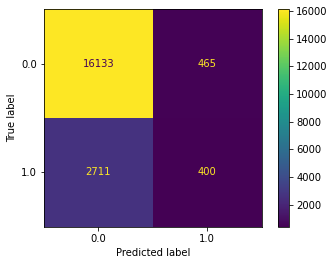

In [ ]:
plot_confusion_matrix(neigh, X_test_n, Y_test_n)

### KNN con datos normalizados, con oversampling

In [ ]:
#Normalizado con oversampling
neigh_n_o = KNeighborsClassifier(n_neighbors=8) # arbol = DecisionTreeClassifier(criterion='entropy', random_state=0)
neigh_n_o = neigh_n_o.fit(X_resampled_n, Y_resampled_n) # arbol = arbol.fit(X_train,Y_train)
y_pred_n_o = neigh_n_o.predict(X_test_n) # y_pred = arbol.predict(X_test)
print('Exactitud: %.2f' % accuracy_score(Y_test_n, y_pred_n_o))
print("Recall: {}".format(recall_score(Y_test_n,y_pred_n_o)))
print("Precisión: {}".format(precision_score(Y_test_n,y_pred_n_o)))
print("Puntuación F1: {}".format(f1_score(Y_test_n,y_pred_n_o)))

Exactitud: 0.73
Recall: 0.5583413693346191
Precisión: 0.3060253699788584
Puntuación F1: 0.395356777057016


In [ ]:
print(classification_report(Y_test_n, y_pred_n_o))

              precision    recall  f1-score   support

         0.0       0.90      0.76      0.83     16598
         1.0       0.31      0.56      0.40      3111

    accuracy                           0.73     19709
   macro avg       0.60      0.66      0.61     19709
weighted avg       0.81      0.73      0.76     19709



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


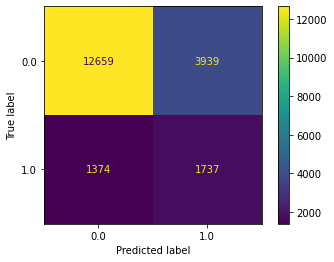

In [ ]:
plot_confusion_matrix(neigh_n_o, X_test_n, Y_test_n)

### KNN sin normalizar, sin oversampling

In [ ]:
#No normalizado
neigh_sn = KNeighborsClassifier(n_neighbors=8) # arbol = DecisionTreeClassifier(criterion='entropy', random_state=0)
neigh_sn = neigh_sn.fit(X_train, Y_train) # arbol = arbol.fit(X_train,Y_train)
y_pred_sn = neigh_sn.predict(X_test) # y_pred = arbol.predict(X_test)
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred_sn))
print("Recall: {}".format(recall_score(Y_test,y_pred_sn)))
print("Precisión: {}".format(precision_score(Y_test,y_pred_sn)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred_sn)))

Exactitud: 0.84
Recall: 0.10864673738347798
Precisión: 0.46174863387978143
Puntuación F1: 0.17590424147801195


In [ ]:
print(classification_report(Y_test, y_pred_sn))

              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91     16598
         1.0       0.46      0.11      0.18      3111

    accuracy                           0.84     19709
   macro avg       0.66      0.54      0.54     19709
weighted avg       0.79      0.84      0.79     19709



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


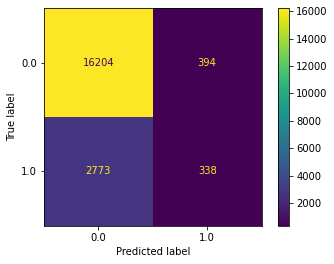

In [ ]:
plot_confusion_matrix(neigh_sn, X_test, Y_test) 

### KNN sin normalizar, con oversampling

In [ ]:
#No normalizado con Oversampling
neigh_sn_o = KNeighborsClassifier(n_neighbors=8) # arbol = DecisionTreeClassifier(criterion='entropy', random_state=0)
neigh_sn_o = neigh_sn_o.fit(X_resampled, Y_resampled) # arbol = arbol.fit(X_train,Y_train)
y_pred_sn_o = neigh_sn_o.predict(X_test) # y_pred = arbol.predict(X_test)
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred_sn_o))
print("Recall: {}".format(recall_score(Y_test,y_pred_sn_o)))
print("Precisión: {}".format(precision_score(Y_test,y_pred_sn_o)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred_sn_o)))

Exactitud: 0.70
Recall: 0.6223079395692703
Precisión: 0.28711256117455136
Puntuación F1: 0.3929368784250051


In [ ]:
print(classification_report(Y_test, y_pred_sn_o))

              precision    recall  f1-score   support

         0.0       0.91      0.71      0.80     16598
         1.0       0.29      0.62      0.39      3111

    accuracy                           0.70     19709
   macro avg       0.60      0.67      0.60     19709
weighted avg       0.81      0.70      0.73     19709



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


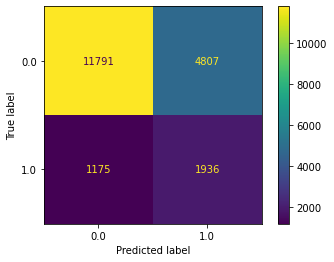

In [ ]:
plot_confusion_matrix(neigh_sn_o, X_test, Y_test) 

Con lo anterior se puede evidenciar que para el caso de KNN el oversampling resulta contraproducente y tiende a reducir la calidad del modelo. Adicionalmente a pesar de que es por un pequeño margen debido a que la muestra normalizada puntea mejor que la no normalizada se utilizara esta para el resto del entrenamiento

### Búsqueda del mejor modelo de KNN

In [ ]:
#Parametros para la busqueda de los mejores Hyperparametros
n_neighbors = list(range(1,10))
p=[1,2]  #Función de distancia 1: manhattan, 2: euclidean, otro valor: minkowski
hyperparameters = dict(n_neighbors=n_neighbors, p=p)

In [ ]:
#Create new KNN object
knn = KNeighborsClassifier()

#Use GridSearch
mejor_modelo_knn = GridSearchCV(knn, hyperparameters, cv=2)

#Fit the model
mejor_modelo_knn.fit(X_resampled_n, Y_resampled_n)

#Print The value of best Hyperparameters
print('Best p:', mejor_modelo_knn.best_estimator_.get_params()['p'])
print('Best n_neighbors:', mejor_modelo_knn.best_estimator_.get_params()['n_neighbors'])

Best p: 1
Best n_neighbors: 1


In [ ]:
# Obtener el mejor modelo.
neigh_final = mejor_modelo_knn.best_estimator_
# Probemos ahora este modelo sobre test.
y_pred_train = neigh_final.predict(X_train_n)
y_pred_test = neigh_final.predict(X_test_n)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train_n, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test_n, y_pred_test))

Exactitud sobre entrenamiento: 1.00
Exactitud sobre test: 0.75


In [ ]:
print(classification_report(Y_test_n, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.88      0.82      0.85     16598
         1.0       0.29      0.40      0.34      3111

    accuracy                           0.75     19709
   macro avg       0.59      0.61      0.59     19709
weighted avg       0.79      0.75      0.77     19709



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


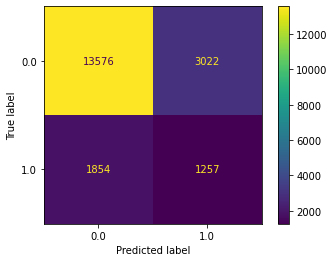

In [ ]:
plot_confusion_matrix(neigh_final, X_test_n, Y_test_n)

## Logistic regression
Elaborado por: Juan Sebastián Arévalo

Por ultimo decidimos utilizar un modelo sencillo de regresión para ver que tanto podriamos estar ganando al utilizar modelos más avanzados como KNN y Arboles de Decisiones. Para esto primero vamos a correr el modelo con un maximo de 100.000 iteraciones y los datos del conjunto de entrenamiento sin utilizar SMOTE. Luego vamos a correr el mismo modelo con los datos ya modificados por SMOTE para comparar entre estos dos muestras cual tendria un mejor resultado para nuestro objetivo. 

In [ ]:
print('Regresión logística sin oversampling')
logit= LogisticRegression(max_iter=100000).fit(X_train, Y_train)
y_pred_logit=logit.predict(X_test)
print('Exactitud: %.4f' % accuracy_score(Y_test, y_pred_logit))
print("Recall: {}".format(recall_score(Y_test,y_pred_logit)))
print("Precisión: {}".format(precision_score(Y_test,y_pred_logit)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred_logit)))

Regresión logística sin oversampling
Exactitud: 0.8493
Recall: 0.18064930890388942
Precisión: 0.5717192268565615
Puntuación F1: 0.27454811919882754


In [ ]:
print('Regresión logística con oversampling')
logit2= LogisticRegression(max_iter=100000).fit(X_resampled, Y_resampled)
y_pred_logit2=logit2.predict(X_test)
print('Exactitud: %.4f' % accuracy_score(Y_test, y_pred_logit2))
print("Recall: {}".format(recall_score(Y_test,y_pred_logit2)))
print("Precisión: {}".format(precision_score(Y_test,y_pred_logit2)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred_logit2)))


Regresión logística con oversampling
Exactitud: 0.7316
Recall: 0.6721311475409836
Precisión: 0.3287218990724729
Puntuación F1: 0.44151182432432434


In [ ]:
print(classification_report(Y_test, y_pred_logit))

              precision    recall  f1-score   support

         0.0       0.86      0.97      0.92     16598
         1.0       0.57      0.18      0.27      3111

    accuracy                           0.85     19709
   macro avg       0.72      0.58      0.60     19709
weighted avg       0.82      0.85      0.81     19709



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


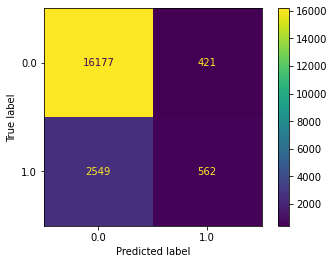

In [ ]:
plot_confusion_matrix(logit, X_test, Y_test) 

In [ ]:
print(classification_report(Y_test, y_pred_logit2))

              precision    recall  f1-score   support

         0.0       0.92      0.74      0.82     16598
         1.0       0.33      0.67      0.44      3111

    accuracy                           0.73     19709
   macro avg       0.63      0.71      0.63     19709
weighted avg       0.83      0.73      0.76     19709



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


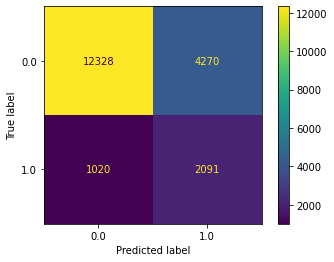

In [ ]:
plot_confusion_matrix(logit2, X_test, Y_test) 

In [ ]:

param_grid = [{
     'penalty' : ['l1', 'l2']},]


logit_cv = GridSearchCV(estimator = LogisticRegression(max_iter=200000,solver='liblinear',random_state = 1005), 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = 10, 
                        verbose = 1,
                        n_jobs=-1)  
logit_= logit_cv.fit(X_resampled, Y_resampled)

logit_.best_estimator_

y_pred_logit2=logit_.predict(X_test)
print('Exactitud: %.4f' % accuracy_score(Y_test_n, y_pred_logit2))
print("Recall: {}".format(recall_score(Y_test_n,y_pred_logit2)))
print("Precisión: {}".format(precision_score(Y_test_n,y_pred_logit2)))
print("Puntuación F1: {}".format(f1_score(Y_test_n,y_pred_logit2)))

Fitting 10 folds for each of 2 candidates, totalling 20 fits
Exactitud: 0.7316
Recall: 0.672452587592414
Precisión: 0.32877573471632876
Puntuación F1: 0.44162972345366264


In [ ]:
models=[arbol_sin_SMOTE,arbol_con_SMOTE,mejor_modelo_knn,logit,logit2]

In [ ]:
names=['arbol_sin_SMOTE','arbol_con_SMOTE','mejor_modelo_knn','logit','logit2']

In [ ]:
rocs=[]
for i in range(0,len(models)):
    prob = models[i].predict_proba(X_test)
    prob = prob[:, 1]
    auc = roc_auc_score(Y_test, prob)
    fpr, tpr, _ = roc_curve(Y_test, prob)
    ll={}
    ll['model']=names[i]
    ll['fpr']=fpr
    ll['tpr']=tpr
    ll['auc']=auc
    ll['_']=_
    rocs.append(ll)